# Standard Libraries:

In [10]:
import pandas as pd
import os
from ggplot import *
import numpy as np
% matplotlib inline

# Read Data and Process:

In [2]:
data_path = 'C:/Users/VN/Documents/GitHub/Sous-vide-crockpot/data'
data_file = 'test2.csv'

In [6]:
data = pd.read_csv(os.path.join(data_path,data_file))
data['Time_minutes'] = data['TIME(sec)'] / 60.0
data['Temp_C'] = (data['INPUT(F)'] - 32) * 5.0 / 9
data.head()

,TIME(sec),INPUT(F),OUTPUT(msec),Notes,Time_minutes,Temp_C
0,0,62.04,94906.25,Target temperature 100F,0.000000,16.688889
1,16,62.04,94906.25,~3 cups water,0.266667,16.688889
2,32,62.04,94906.25,Kp = 2500,0.533333,16.688889
3,48,62.15,94625.00,Ki = 0,0.800000,16.750000
4,63,62.26,94343.76,Kd = 0,1.050000,16.811111


In [4]:
data.describe()

,TIME(sec),INPUT(F),OUTPUT(msec)
count,366.000000,366.000000,366.000000
mean,2877.653005,92.574918,18559.173798
std,1667.994595,10.831583,27080.526074
min,0.000000,62.040000,-2968.750000
25%,1439.000000,93.175000,4906.250000
50%,2878.000000,97.810000,5468.750000
75%,4316.000000,98.040000,17070.325000
max,5755.000000,101.190000,94906.250000


# Results:

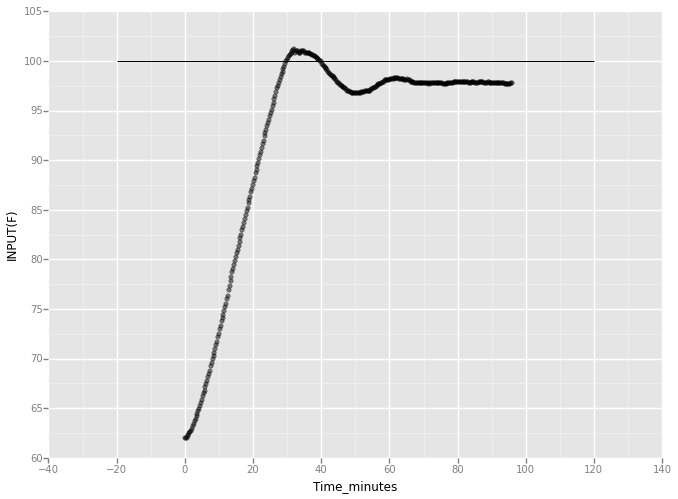

<ggplot: (29406482)>

In [8]:
ggplot(aes(x='Time_minutes', y = 'INPUT(F)'), data = data)\
+ geom_point(alpha = .5)\
+ geom_hline(yintercept=[100])

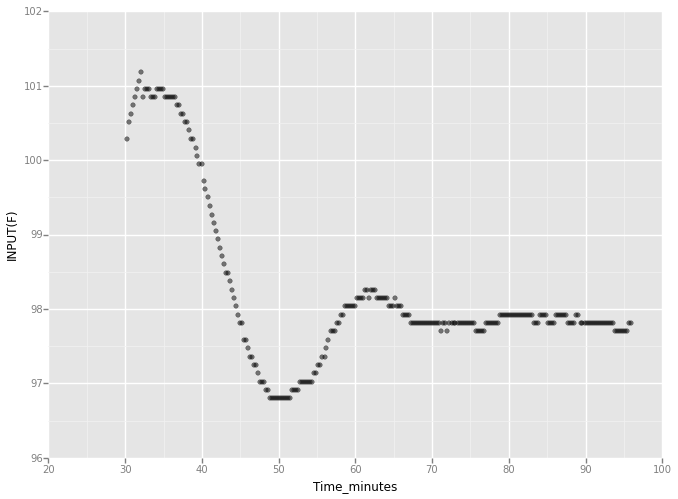

<ggplot: (29335738)>

In [18]:
ggplot(aes(x='Time_minutes', y = 'INPUT(F)'), data = data[(data.Time_minutes > 30) & (data.Time_minutes < 100)])\
+ geom_point(alpha = .5)\

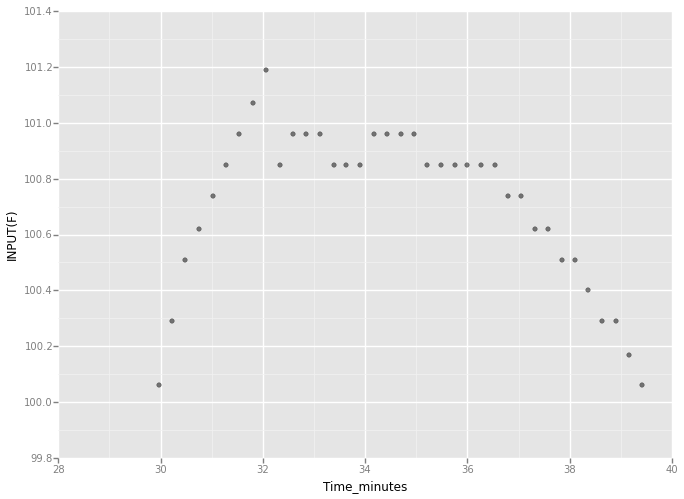

<ggplot: (28751164)>

In [15]:
ggplot(aes(x='Time_minutes', y = 'INPUT(F)'), data = data[data['INPUT(F)'] > 100])\
+ geom_point(alpha = .5)\

In [11]:
time_diff = pd.DataFrame()
time_diff['time_diff'] = np.diff(data['TIME(sec)'])

stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.


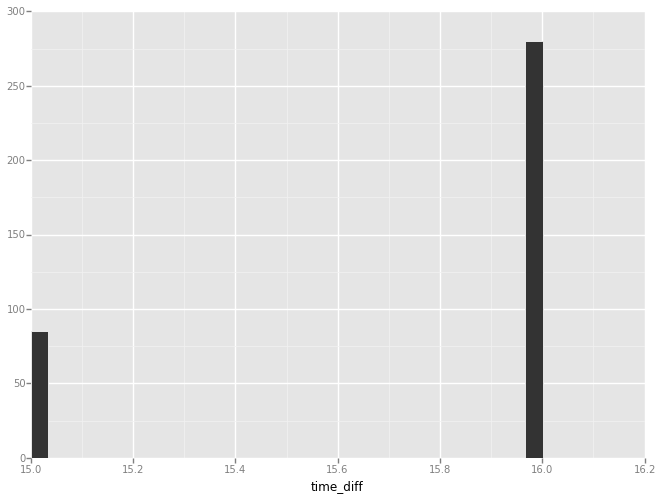

<ggplot: (28748299)>

In [12]:
ggplot(aes(x='time_diff'), data = time_diff) + geom_histogram()